In [3]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

### Load dataset
Loading the MNIST dataset of handwritten digits. The dataset is separated in two for training and testing.

In [4]:
# X     => input images
# y     => output label
# train => training dataset
# test  => testing dataset, after training
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
# Show the dataset size and shape
def dataset_shape():
    print("".ljust(9, " "), "images".ljust(9), "image_size")
    print("X_train".ljust(9, " "), str(X_train.shape[0]).ljust(9, " "), "x".join([str(_) for _ in X_train.shape[1:]]))
    print("y_train".ljust(9, " "), str(y_train.shape[0]).ljust(9, " "), "x".join([str(_) for _ in y_train.shape[1:]]))
    print("X_test".ljust(9, " "), str(X_test.shape[0]).ljust(9, " "), "x".join([str(_) for _ in X_test.shape[1:]]))
    print("y_test".ljust(9, " "), str(y_test.shape[0]).ljust(9, " "), "x".join([str(_) for _ in y_test.shape[1:]]))
    
dataset_shape()

          images    image_size
X_train   60000     28x28
y_train   60000     
X_test    10000     28x28
y_test    10000     


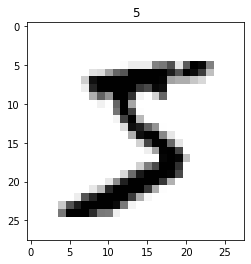

In [6]:
# Show the image from the training dataset at the given index
def show_image_index(i):
    plt.imshow(X_train[i], cmap="binary")
    plt.title(y_train[i])
    plt.show()
    
show_image_index(0) # Show image at index 0 of the training dataset

### Preprocessing

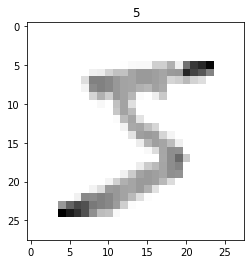

In [7]:
# Normalize the input data color values from [0, 255] to [0.0, 1.0]
X_train = keras.utils.normalize(X_train, axis=1)
X_test = keras.utils.normalize(X_test, axis=1)

show_image_index(0)

In [8]:
# Reshape the input data to 3 dimensions for the training model
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

dataset_shape()

          images    image_size
X_train   60000     28x28x1
y_train   60000     
X_test    10000     28x28x1
y_test    10000     


In [9]:
# Convert label classes to one hot vectors
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

dataset_shape()

          images    image_size
X_train   60000     28x28x1
y_train   60000     10
X_test    10000     28x28x1
y_test    10000     10


### Model

In [10]:
model = Sequential()                                                        # Sequential Model
model.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation="relu"))      # Input layer

model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.25))

model.add(Dense(10, activation="softmax"))                                  # Output layer

model.summary()
model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [11]:
# Callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
es = EarlyStopping(monitor="val_acc", min_delta=0.01, patience=4, verbose=1)

# Model Checkpoint
mc = ModelCheckpoint(filepath="./bestmodel.h5", monitor="val_acc", verbose=1, save_best_only=True)

# Packaged callbacks
cb = [es, mc]

### Model Training

In [12]:
# Train model
history = model.fit(X_train, y_train, epochs=5, validation_split=0.3, callbacks=cb)
# Save model
history.model.save("./bestmodel.h5")

Epoch 1/5
1200/1313 [==========================>...] - ETA: 1s - loss: 0.2734 - accuracy: 0.9167

KeyboardInterrupt: 

In [ ]:
model_saved = keras.models.load_model("./bestmodel.h5")
score = model_saved.evaluate(X_test, y_test)
print(f"The model accuracy is {score[1]}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0458 - accuracy: 0.9860
The model accuracy is 0.9860000014305115
